# Libraries & Packages

In [3]:
# Libaray installations that generates fake data
!pip install faker

In [4]:
# Core imports
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime

In [5]:
# Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# Math Utilities
from math import sin,cos,pi

In [7]:
!pip install faker
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from math import sin,cos,pi
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib.colors import LinearSegmentedColormap
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from faker import Faker
from datetime import date, timedelta
import random
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)



# Describe the datasets

In [8]:
# Reading the dataset
flights = pd.read_csv('flights.csv')
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')

In [9]:
# Display the flights dataset
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Display the airlines dataset
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [11]:
# Display the airports dataset
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [12]:
# Statistics summary about the flights dataset
print(flights.describe())

            YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5819079.0  5.819079e+06  5.819079e+06  5.819079e+06   5.819079e+06   
mean      2015.0  6.524085e+00  1.570459e+01  3.926941e+00   2.173093e+03   
std          0.0  3.405137e+00  8.783425e+00  1.988845e+00   1.757064e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  4.000000e+00  8.000000e+00  2.000000e+00   7.300000e+02   
50%       2015.0  7.000000e+00  1.600000e+01  4.000000e+00   1.690000e+03   
75%       2015.0  9.000000e+00  2.300000e+01  6.000000e+00   3.230000e+03   
max       2015.0  1.200000e+01  3.100000e+01  7.000000e+00   9.855000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         5.819079e+06    5.732926e+06     5.732926e+06  5.730032e+06   
mean          1.329602e+03    1.335204e+03     9.370158e+00  1.607166e+01   
std           4.837518e+02    4.964233e+02     3.708094e+01  8.895574e+00  

In [13]:
# Statistics summary about the airlines dataset
print(airlines.describe())

       IATA_CODE                AIRLINE
count         14                     14
unique        14                     14
top           UA  United Air Lines Inc.
freq           1                      1


In [14]:
# Statistics summary about the airports dataset
print(airports.describe())

         LATITUDE   LONGITUDE
count  319.000000  319.000000
mean    38.981244  -98.378964
std      8.616736   21.523492
min     13.483450 -176.646030
25%     33.652040 -110.839385
50%     39.297610  -93.403070
75%     43.154675  -82.722995
max     71.285450  -64.798560


In [15]:
# 1. Discover column data types:
data_types = pd.DataFrame(flights.dtypes, columns=['Data Type'])
#2. Count missing data:
missing_data_counts = pd.DataFrame(flights.isnull().sum(), columns=['# of Missing Values'])
#3. Count present data:
present_data_counts = pd.DataFrame(flights.count(), columns=['# of Present Values'])
#4. Count unique data:
unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(flights.columns.values): unique_value_counts.loc[v] = [flights[v].nunique()]
#5. Create the report:
data_quality_report = data_types.join(present_data_counts).join(missing_data_counts).join(unique_value_counts)
#6. Print the report:
print("\nData Quality Report")
data_quality_report


Data Quality Report


,Data Type,# of Present Values,# of Missing Values,Unique Values
YEAR,int64,5819079,0,1
MONTH,int64,5819079,0,12
DAY,int64,5819079,0,31
DAY_OF_WEEK,int64,5819079,0,7
AIRLINE,object,5819079,0,14
FLIGHT_NUMBER,int64,5819079,0,6952
TAIL_NUMBER,object,5804358,14721,4897
ORIGIN_AIRPORT,object,5819079,0,930
DESTINATION_AIRPORT,object,5819079,0,930
SCHEDULED_DEPARTURE,int64,5819079,0,1321


In [16]:
# 1. Discover column data types:
data_types = pd.DataFrame(airlines.dtypes, columns=['Data Type'])
#2. Count missing data:
missing_data_counts = pd.DataFrame(airlines.isnull().sum(), columns=['# of Missing Values'])
#3. Count present data:
present_data_counts = pd.DataFrame(airlines.count(), columns=['# of Present Values'])
#4. Count unique data:
unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(airlines.columns.values): unique_value_counts.loc[v] = [airlines[v].nunique()]
#5. Create the report:
data_quality_report = data_types.join(present_data_counts).join(missing_data_counts).join(unique_value_counts)
#6. Print the report:
print("\nData Quality Report")
data_quality_report


Data Quality Report


,Data Type,# of Present Values,# of Missing Values,Unique Values
IATA_CODE,object,14,0,14
AIRLINE,object,14,0,14


In [17]:
# 1. Discover column data types:
data_types = pd.DataFrame(airports.dtypes, columns=['Data Type'])
#2. Count missing data:
missing_data_counts = pd.DataFrame(airports.isnull().sum(), columns=['# of Missing Values'])
#3. Count present data:
present_data_counts = pd.DataFrame(airports.count(), columns=['# of Present Values'])
#4. Count unique data:
unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(airports.columns.values): unique_value_counts.loc[v] = [airports[v].nunique()]
#5. Create the report:
data_quality_report = data_types.join(present_data_counts).join(missing_data_counts).join(unique_value_counts)
#6. Print the report:
print("\nData Quality Report")
data_quality_report


Data Quality Report


,Data Type,# of Present Values,# of Missing Values,Unique Values
IATA_CODE,object,322,0,322
AIRPORT,object,322,0,322
CITY,object,322,0,308
STATE,object,322,0,54
COUNTRY,object,322,0,1
LATITUDE,float64,319,3,319
LONGITUDE,float64,319,3,319


# Explarotary Data Analysis

In [18]:
def dataOverview(airlines, airports, flights):
    
    # YEAR, MONTH, DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT, and DESTINATION_AIRPORT 
    # Cancellation Reasons
    cancelled = flights['CANCELLATION_REASON']
    cancelled.dropna(inplace=True)
    cancelledCount = dict(cancelled.value_counts())
    labels = ['Weather','Airline','National Air System','Security']
    sizes = cancelledCount.values()
    fig, ax = plt.subplots(figsize=(8,8))
    ax.pie(sizes, labels=labels, pctdistance=1.25, labeldistance=1.45, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 20})
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
    # Flights on Different Days of Week
    daysOfWeek = flights['DAY_OF_WEEK']
    dayCounts = dict(daysOfWeek.value_counts())
    dayFreq = {}
    for day in sorted(dayCounts):
        dayFreq[day] = dayCounts[day]
    plt.figure(figsize=(12,8))
    flightFreq = list(dayFreq.values())
    flightFreq.append(dayFreq[1]) # add monday
    flightFreq.append(dayFreq[2]) # add tuesday
    days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun','Mon.','Tue...']
    plt.plot(days,flightFreq)
    plt.xlabel("Days of week", fontsize=16)
    plt.ylabel("No of flights", fontsize=16)
    plt.title("No of flights on days of week", fontsize=16)
    plt.tick_params(labelsize=16)
    plt.show()
    
    # Flights in Different Months
    months = flights['MONTH']
    monthCounts = dict(months.value_counts())
    monthFreq = {}
    for month in sorted(monthCounts):
        monthFreq[month] = monthCounts[month]
    plt.figure(figsize=(12,8))
    flightFreq = list(monthFreq.values())
    monthsArr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.plot(monthsArr, flightFreq)
    plt.xlabel("Months", fontsize=16)
    plt.ylabel("No of flights", fontsize=16)
    plt.title("No of flights on different months", fontsize=16)
    plt.tick_params(labelsize=16)
    plt.show()
    
    # Delay Threshold
    ttl = flights.shape[0]
    threshold = 3
    delayLessThanThreshold = flights[flights['ARRIVAL_DELAY'] <= threshold].shape[0] / ttl
    print(delayLessThanThreshold)

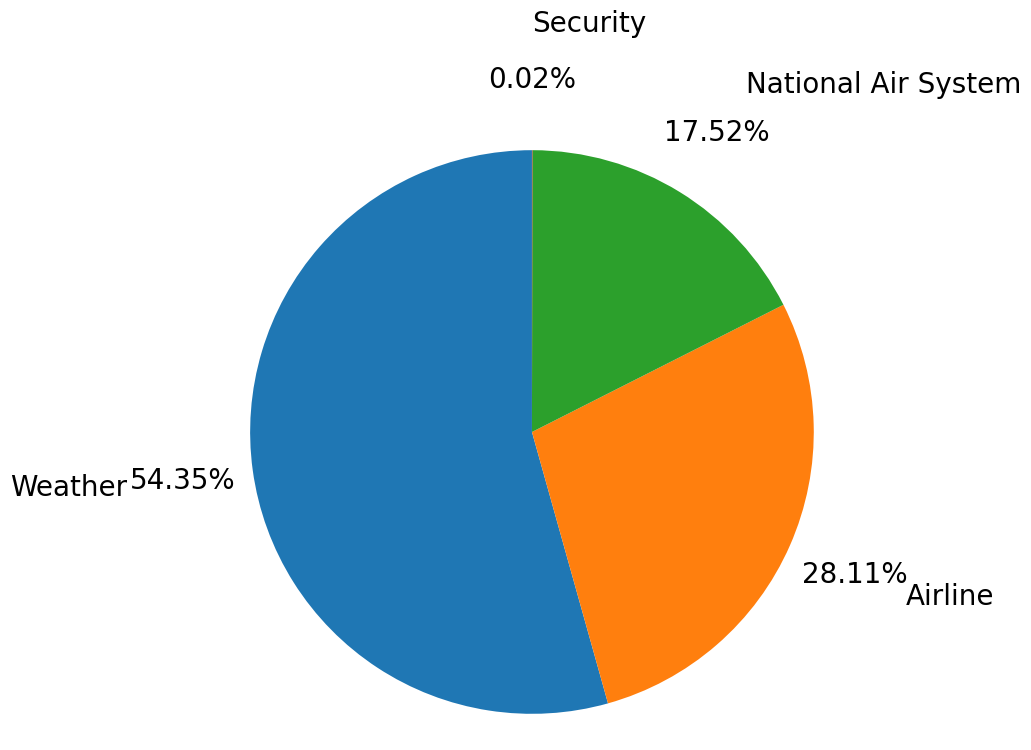

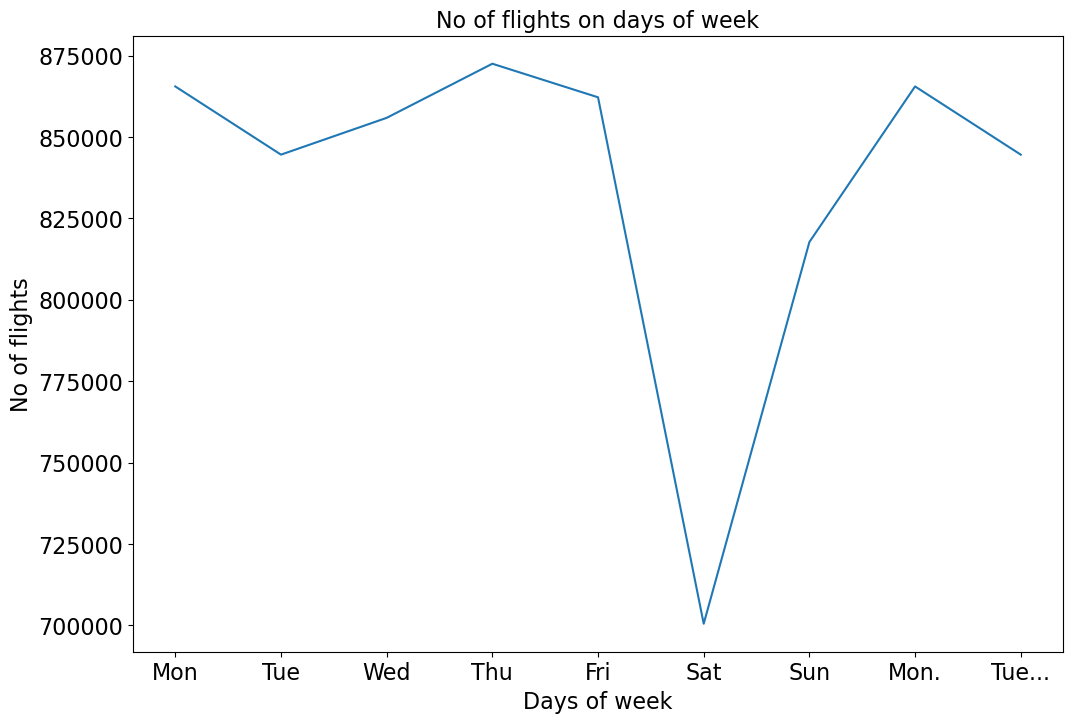

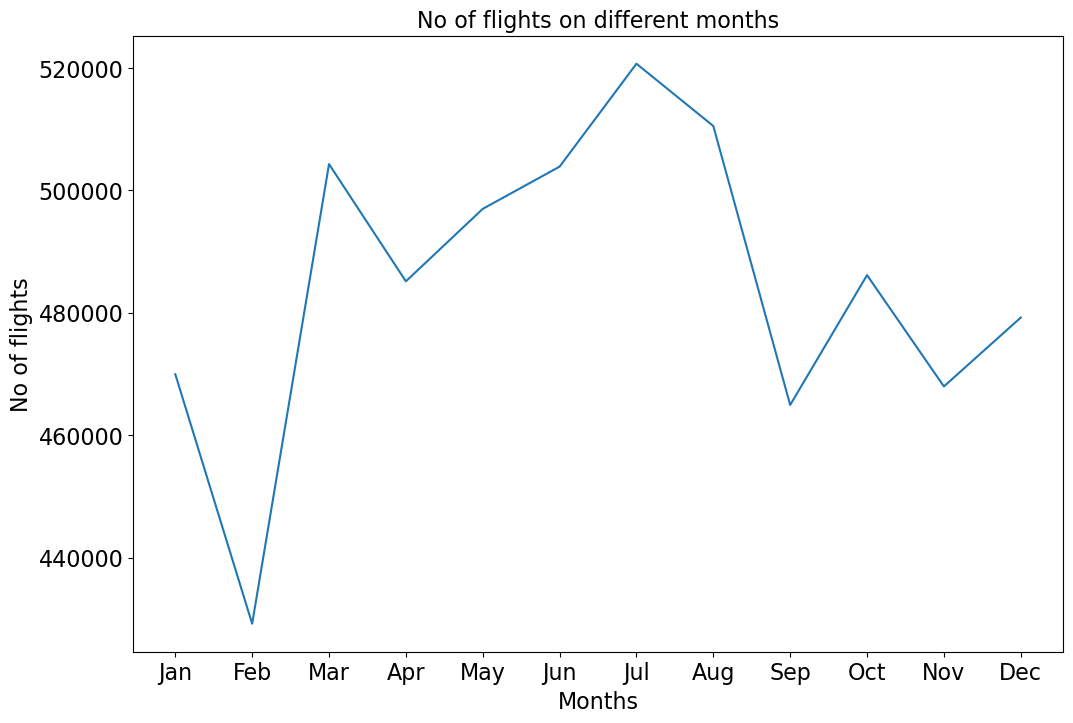

0.6780059181186576


In [19]:
dataOverview(airlines, airports, flights)

In [20]:
def stats(g):
    # Statistical Information for a Group
    return {'mean':g.mean(), 'variance':g.var(), 'count':g.count(), 'min':g.min(), 'max':g.max()}

In [21]:
def exploratoryDataAnalysis(airlines, airports, flights):
    
    # Overall analysis
    # Air Traffic Share of Airlines
     plt.figure(figsize=(15, 8))
     airline_counts = flights['AIRLINE'].value_counts()
     plt.bar(airline_counts.index, airline_counts.values)
     plt.title('Airline Distribution')
     plt.xlabel('Airline')
     plt.ylabel('Count')
     plt.xticks(rotation=45, ha='right')
     plt.show()
    
    # Calculating Data Statistics
     Origin_Stats = flights['ARRIVAL_DELAY'].groupby(flights['ORIGIN_AIRPORT']).apply(stats).unstack().sort_values('count',ascending=False)
     Destination_Stats = flights['ARRIVAL_DELAY'].groupby(flights['DESTINATION_AIRPORT']).apply(stats).unstack().sort_values('count',ascending=False)
     Airline_Stats = flights['ARRIVAL_DELAY'].groupby(flights['AIRLINE']).apply(stats).unstack().sort_values('mean')
     print(Airline_Stats)
    
    # Airline Delays on Different Days of Week ********* changes
     Days = ["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
     Airline_Day_Stats = pd.DataFrame()
     for a in flights['AIRLINE'].unique():
         x = flights[flights['AIRLINE']==a]
         t = x['ARRIVAL_DELAY'].groupby(flights['DAY']).mean()
         Airline_Day_Stats[a]=t
     Airline_Day_Stats.dropna(inplace=True)
     print(Airline_Day_Stats)
     sns.set(context="paper")
     plt.subplots(figsize=(10,8))
     plt.title("Mean Delay for Airline Vs. Day of Week")
     sns.heatmap(Airline_Day_Stats, linewidths=0.01, cmap=LinearSegmentedColormap.from_list('rg',["g", "w", "r"], N=256),robust=True,yticklabels=Days)
     plt.show()
    
    # Busiest airports and Airlines
     Airports = flights['DESTINATION_AIRPORT'].groupby(flights["DESTINATION_AIRPORT"]).count().sort_values(ascending=False).iloc[:11].keys().tolist()
     map = flights[['AIRLINE','DESTINATION_AIRPORT','ARRIVAL_DELAY']]
     frames = list()
     for x in Airports:
         frames.append(map.loc[map["DESTINATION_AIRPORT"] == x])
     map = pd.concat(frames)
     airline_city_delay = pd.DataFrame()
     for airlines in map["AIRLINE"].unique():
         t = map.loc[map["AIRLINE"] == airlines]
         temp = t["ARRIVAL_DELAY"].groupby(t["DESTINATION_AIRPORT"]).mean()
         airline_city_delay[airlines] = temp
     sns.set(context="paper")
     plt.subplots(figsize=(10,8))
     plt.title("Mean Delay for Airline Vs. Destination Airports")
     sns.heatmap(airline_city_delay, linewidths=0.01, cmap=LinearSegmentedColormap.from_list('rg',["g", "w", "r"], N=256),robust=True,yticklabels=Airports)
     plt.show()
    
    # Distance and Delay
     map = flights[["DISTANCE","ARRIVAL_DELAY","AIRLINE"]].copy()
     interval = list()
     for i in range(0,5000,100):
         interval.append(i)
     map["DISTANCE_INTERVAL"] = pd.cut(x = map["DISTANCE"], bins = interval)
     map["DISTANCE_MID"] = map["DISTANCE_INTERVAL"].apply(lambda x : x.mid)
     newMap = map["ARRIVAL_DELAY"].groupby(map["DISTANCE_MID"]).mean().to_frame()
     newMap.dropna(inplace=True)
     newMap.plot.line(title = "Distance vs Delay graph (Bucket Size:100)")
     plt.show()
    
    # Distribution of Arrival Delay
     sns.displot(flights['ARRIVAL_DELAY'], bins = [i for i in range(-50,100)])
     plt.show()


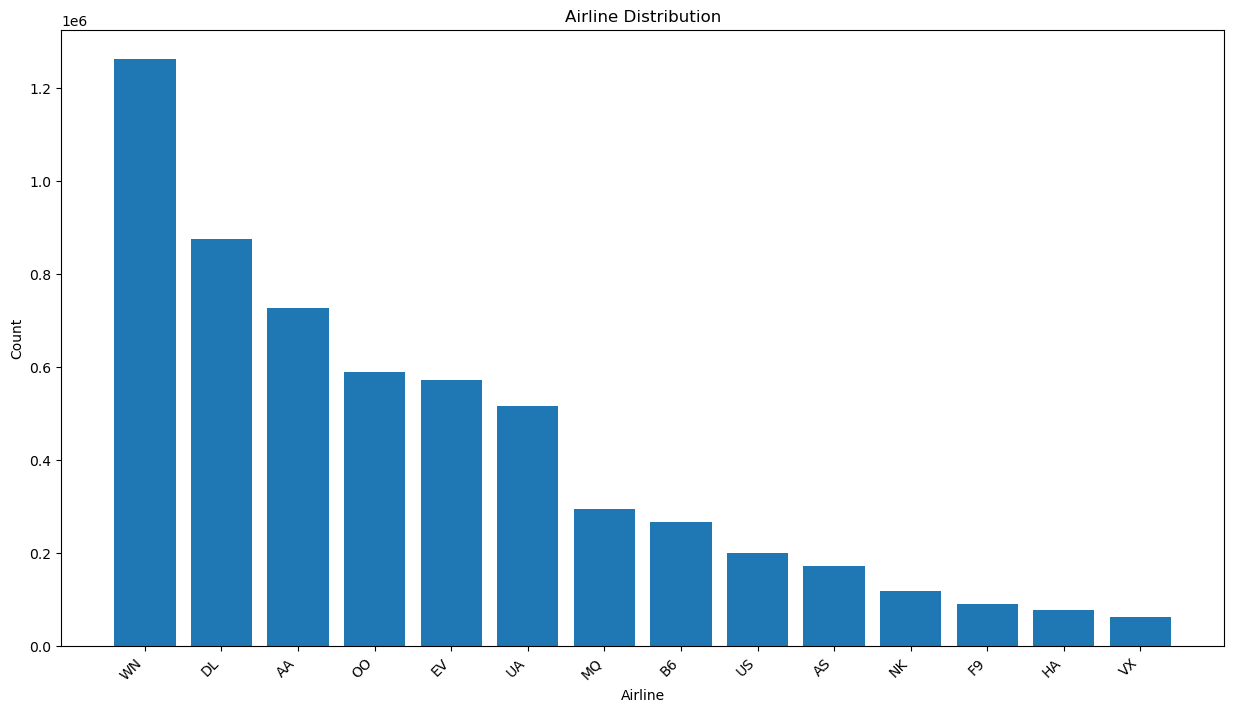

              mean     variance      count   min     max
AIRLINE                                                 
AS       -0.976563   822.473791   171439.0 -82.0   950.0
DL        0.186754  1477.574045   870275.0 -79.0  1274.0
HA        2.023093   661.258094    76041.0 -67.0  1467.0
AA        3.451372  1959.545192   712935.0 -87.0  1971.0
US        3.706209  1048.383000   194223.0 -87.0   750.0
WN        4.374964  1074.135157  1242403.0 -73.0   659.0
VX        4.737706  1268.896881    61248.0 -81.0   651.0
UA        5.431594  1943.153465   507762.0 -81.0  1294.0
OO        5.845652  1541.166566   576814.0 -69.0  1372.0
MQ        6.457873  1976.523738   278791.0 -63.0  1528.0
EV        6.585379  1655.054928   554752.0 -64.0  1223.0
B6        6.677861  1714.005728   262042.0 -76.0  1002.0
F9       12.504706  2658.614354    90090.0 -73.0  1101.0
NK       14.471800  2107.123087   115193.0 -60.0   833.0
           AS        AA         US        DL         NK         UA        HA  \
DAY     

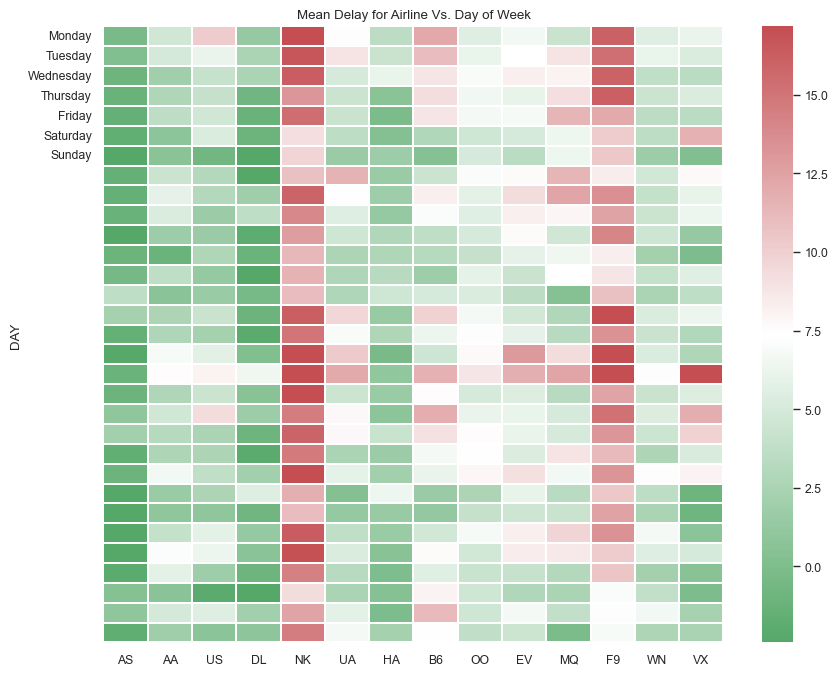

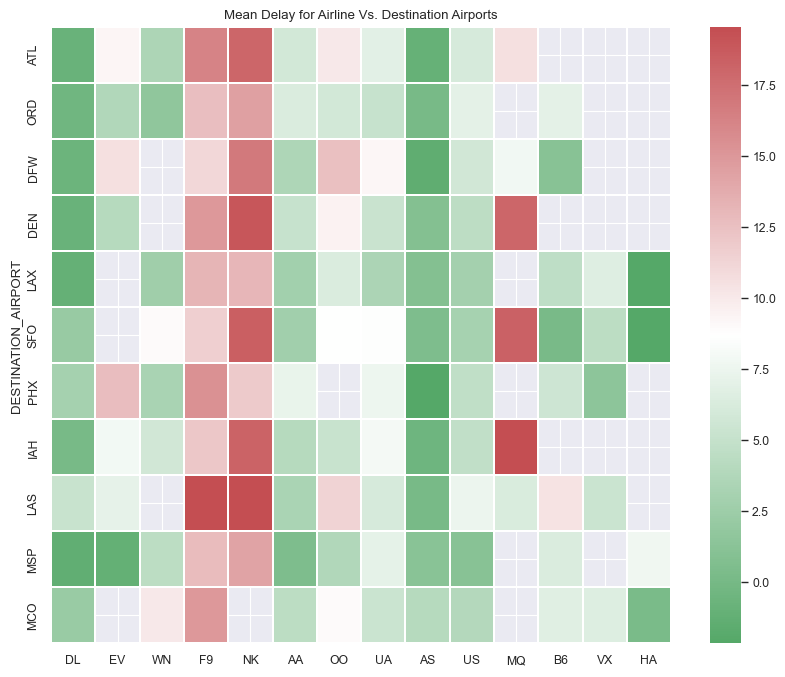

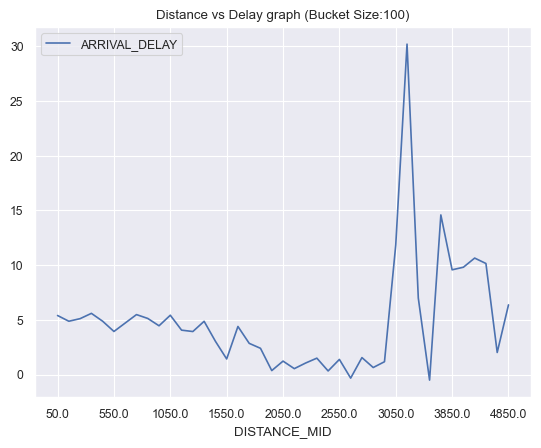

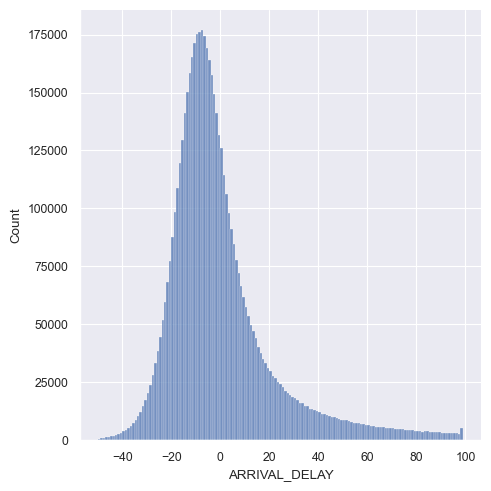

In [22]:
exploratoryDataAnalysis(airlines, airports, flights)

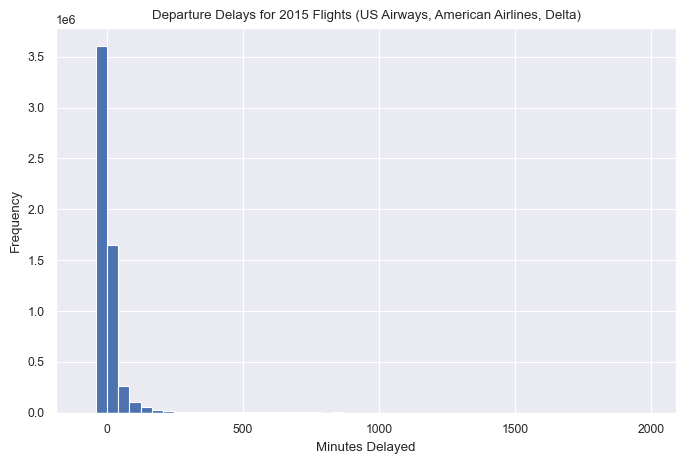

In [23]:
# How frequent is a flight delayed due to departure delay?
flights.hist(column= ['DEPARTURE_DELAY'], figsize = (8, 5), bins=50);
plt.title("Departure Delays for 2015 Flights (US Airways, American Airlines, Delta)")
plt.xlabel("Minutes Delayed")
plt.ylabel("Frequency")
plt.show()

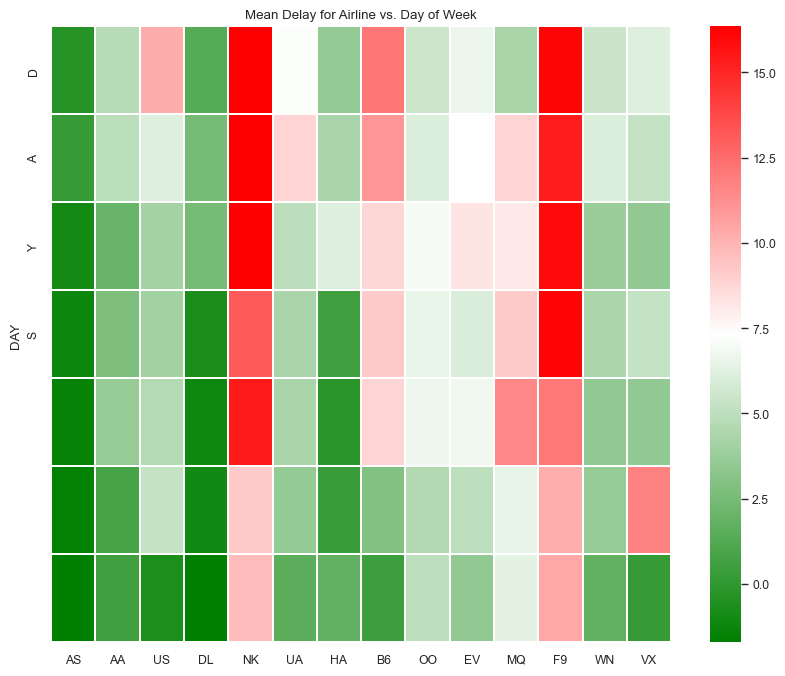

In [24]:
flights['ARRIVAL_DELAY'] = pd.to_numeric(flights['ARRIVAL_DELAY'], errors='coerce')  # Convert delays to numeric, setting errors to NaN

Airline_Day_Stats = pd.DataFrame()

# Calculate mean arrival delay for each airline by day of week
for airline in flights['AIRLINE'].unique():
    subset = flights[flights['AIRLINE'] == airline]
    means = subset.groupby('DAY')['ARRIVAL_DELAY'].mean()  
    Airline_Day_Stats[airline] = means

# Reindex the DataFrame to include all days and replace NaNs with a filler, e.g., 0 or an average value
Airline_Day_Stats = Airline_Day_Stats.reindex(range(1, 8)).fillna(0)  # Assuming 'DAY' values are 1-7 

# Set up the plotting
sns.set(context="paper")
plt.subplots(figsize=(10, 8))
plt.title("Mean Delay for Airline vs. Day of Week")

# Custom color map from green (low delay) to red (high delay)
cmap = LinearSegmentedColormap.from_list('rg', ["green", "white", "red"], N=256)
sns.heatmap(Airline_Day_Stats, linewidths=0.01, cmap=cmap, robust=True, yticklabels='DAYS')
plt.show()

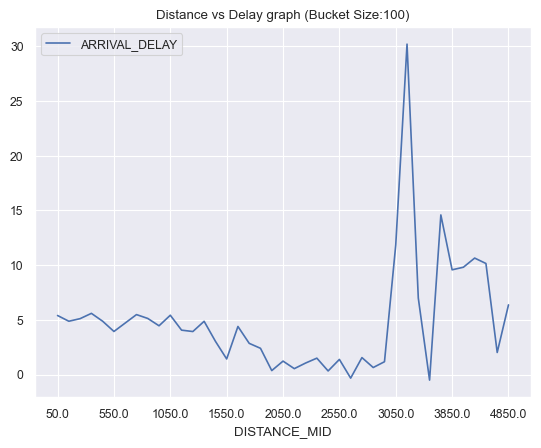

In [25]:
# Distance and Delay

map = flights[["DISTANCE","ARRIVAL_DELAY","AIRLINE"]].copy()
interval = list()
for i in range(0,5000,100):interval.append(i)

map["DISTANCE_INTERVAL"] = pd.cut(x = map["DISTANCE"], bins = interval)
map["DISTANCE_MID"] = map["DISTANCE_INTERVAL"].apply(lambda x : x.mid)
newMap = map["ARRIVAL_DELAY"].groupby(map["DISTANCE_MID"]).mean().to_frame()
newMap.dropna(inplace=True)
newMap.plot.line(title = "Distance vs Delay graph (Bucket Size:100)")
plt.show()

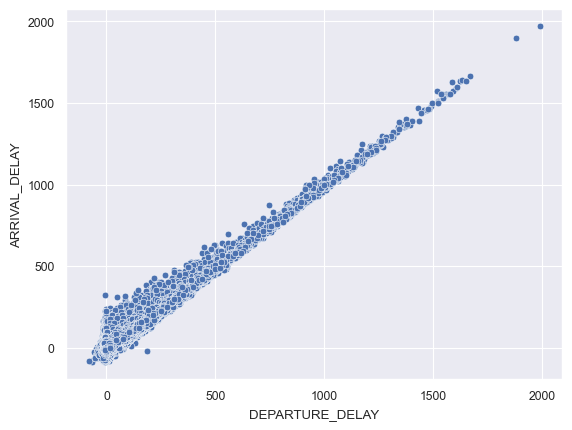

In [26]:
# plot relationship Actual DEPARTUR time & Actual ARRIVAL time
ax = sns.scatterplot(x='DEPARTURE_DELAY', y='ARRIVAL_DELAY', data=flights)

Text(0.5, 1.0, 'Security Delayed Distribution Per Airline')

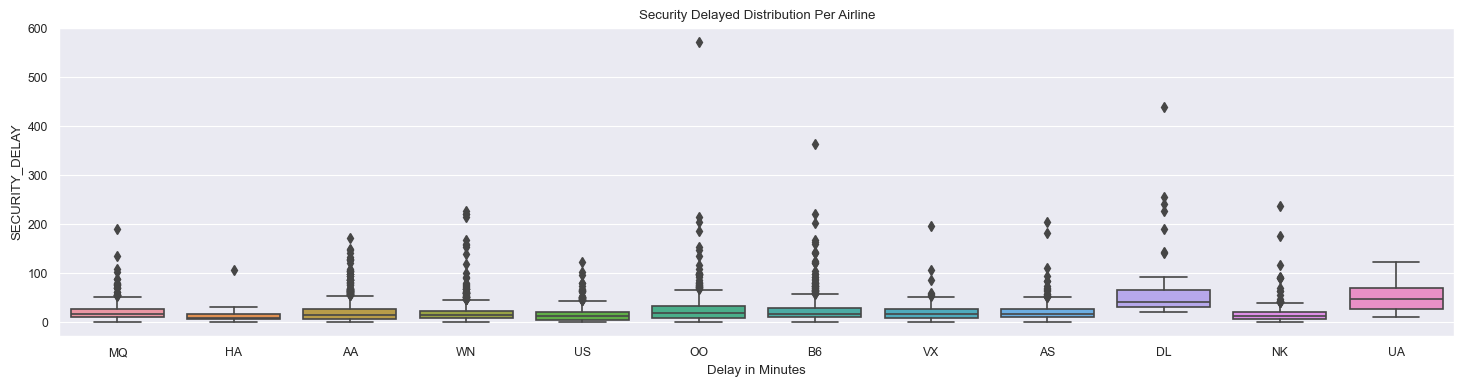

In [27]:
# Security Delay per airline
plt.figure(figsize=(18, 4))
box_data = flights[flights.SECURITY_DELAY>0][['SECURITY_DELAY','AIRLINE']]
ax=sns.boxplot(x='AIRLINE', y='SECURITY_DELAY', data=box_data)  
plt.xlabel('Delay in Minutes')
plt.title('Security Delayed Distribution Per Airline')

Text(0.5, 1.0, 'Air Sysytem Delayed Distribution Per Airline')

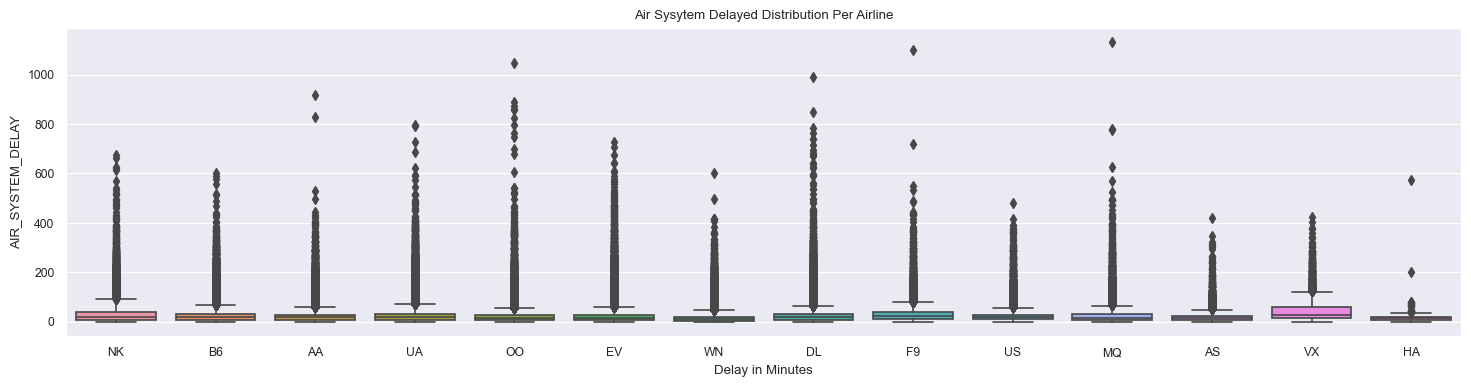

In [28]:
# AIR_SYSTEM_DELAY per airline
plt.figure(figsize=(18, 4))
box_data = flights[flights.AIR_SYSTEM_DELAY>0][['AIR_SYSTEM_DELAY','AIRLINE']]
ax=sns.boxplot(x='AIRLINE', y='AIR_SYSTEM_DELAY', data=box_data)    
plt.xlabel('Delay in Minutes')
plt.title('Air Sysytem Delayed Distribution Per Airline')

Text(0.5, 1.0, 'Airline Delay Distribution Per Airline')

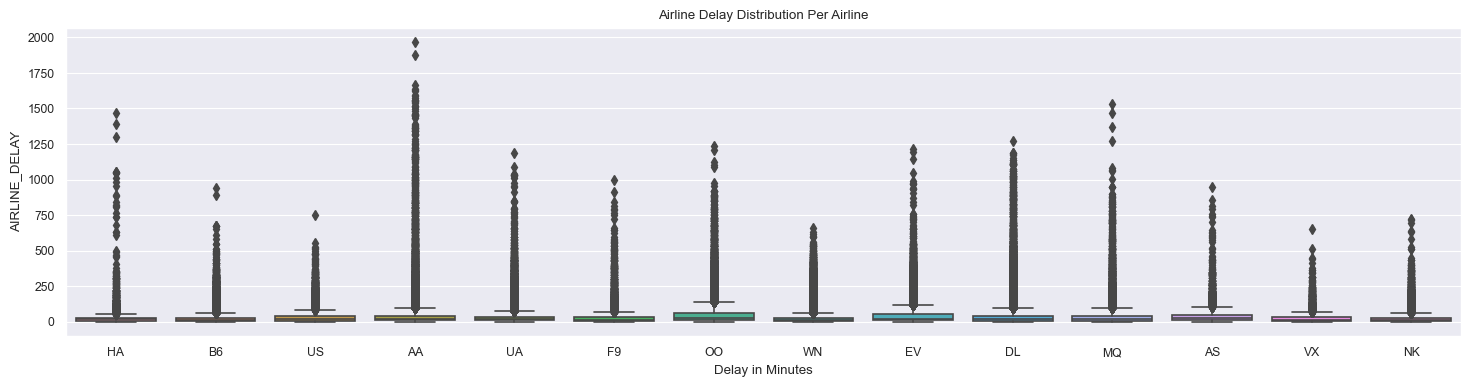

In [29]:
# AIRLINE_DELAY per airline
plt.figure(figsize=(18, 4))
box_data = flights[flights.AIRLINE_DELAY>0][['AIRLINE_DELAY','AIRLINE']]
ax=sns.boxplot(x='AIRLINE', y='AIRLINE_DELAY', data=box_data)    
plt.xlabel('Delay in Minutes')
plt.title('Airline Delay Distribution Per Airline')

Text(0.5, 1.0, 'Late aircraft Delay Distribution Per Airline')

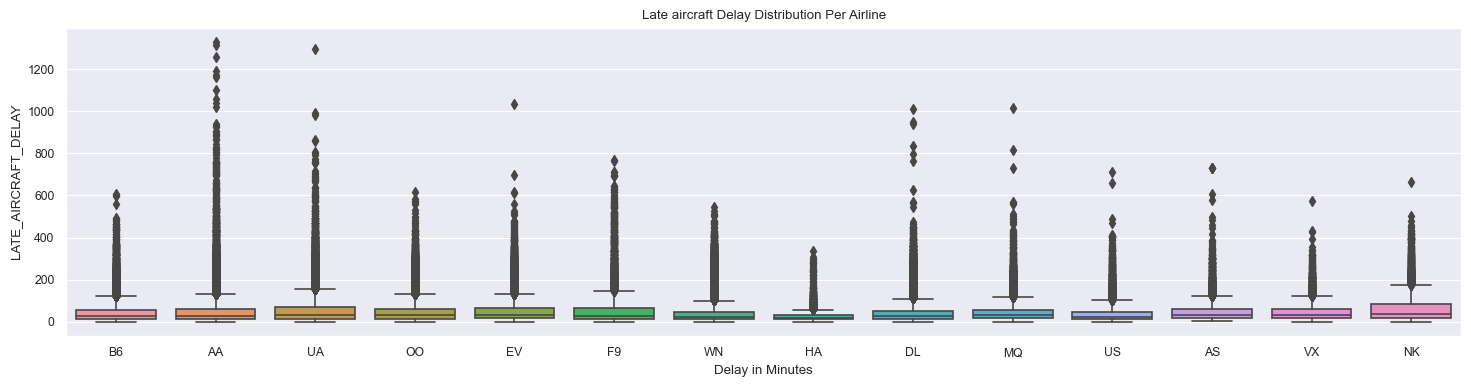

In [30]:
# LATE_AIRCRAFT_DELAY per airline
plt.figure(figsize=(18, 4))
box_data = flights[flights.LATE_AIRCRAFT_DELAY>0][['LATE_AIRCRAFT_DELAY','AIRLINE']]
ax=sns.boxplot(x='AIRLINE', y='LATE_AIRCRAFT_DELAY', data=box_data)  
plt.xlabel('Delay in Minutes')
plt.title('Late aircraft Delay Distribution Per Airline')

Text(0.5, 1.0, 'Weather Delay Distribution Per Airline')

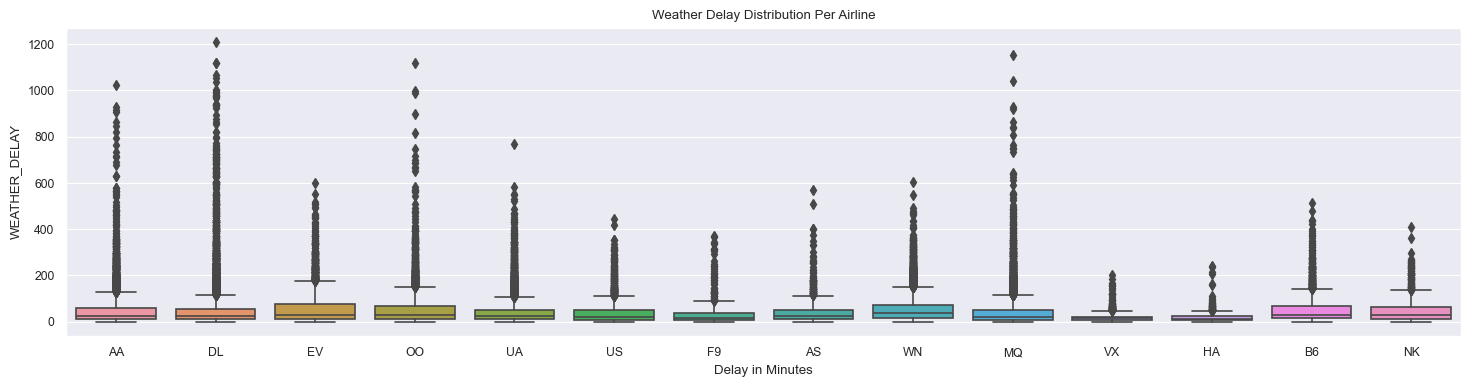

In [31]:
# WEATHER_DELAY per airline
plt.figure(figsize=(18, 4))
box_data = flights[flights.WEATHER_DELAY>0][['WEATHER_DELAY','AIRLINE']]
ax=sns.boxplot(x='AIRLINE', y='WEATHER_DELAY', data=box_data)    # showfliers=False
plt.xlabel('Delay in Minutes')
plt.title('Weather Delay Distribution Per Airline')

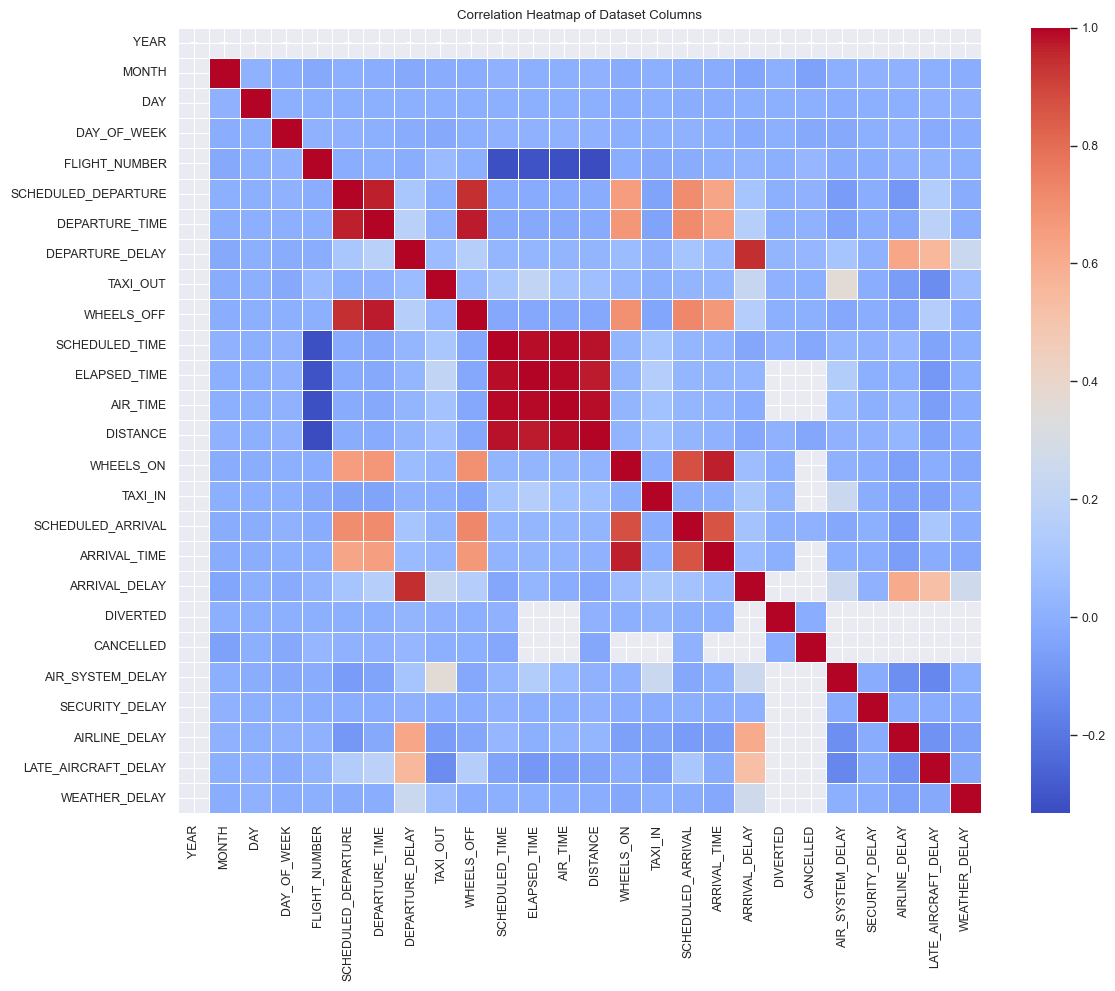

In [32]:
# Select only numeric columns
numeric_columns = flights.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Dataset Columns')
plt.tight_layout()
plt.show()

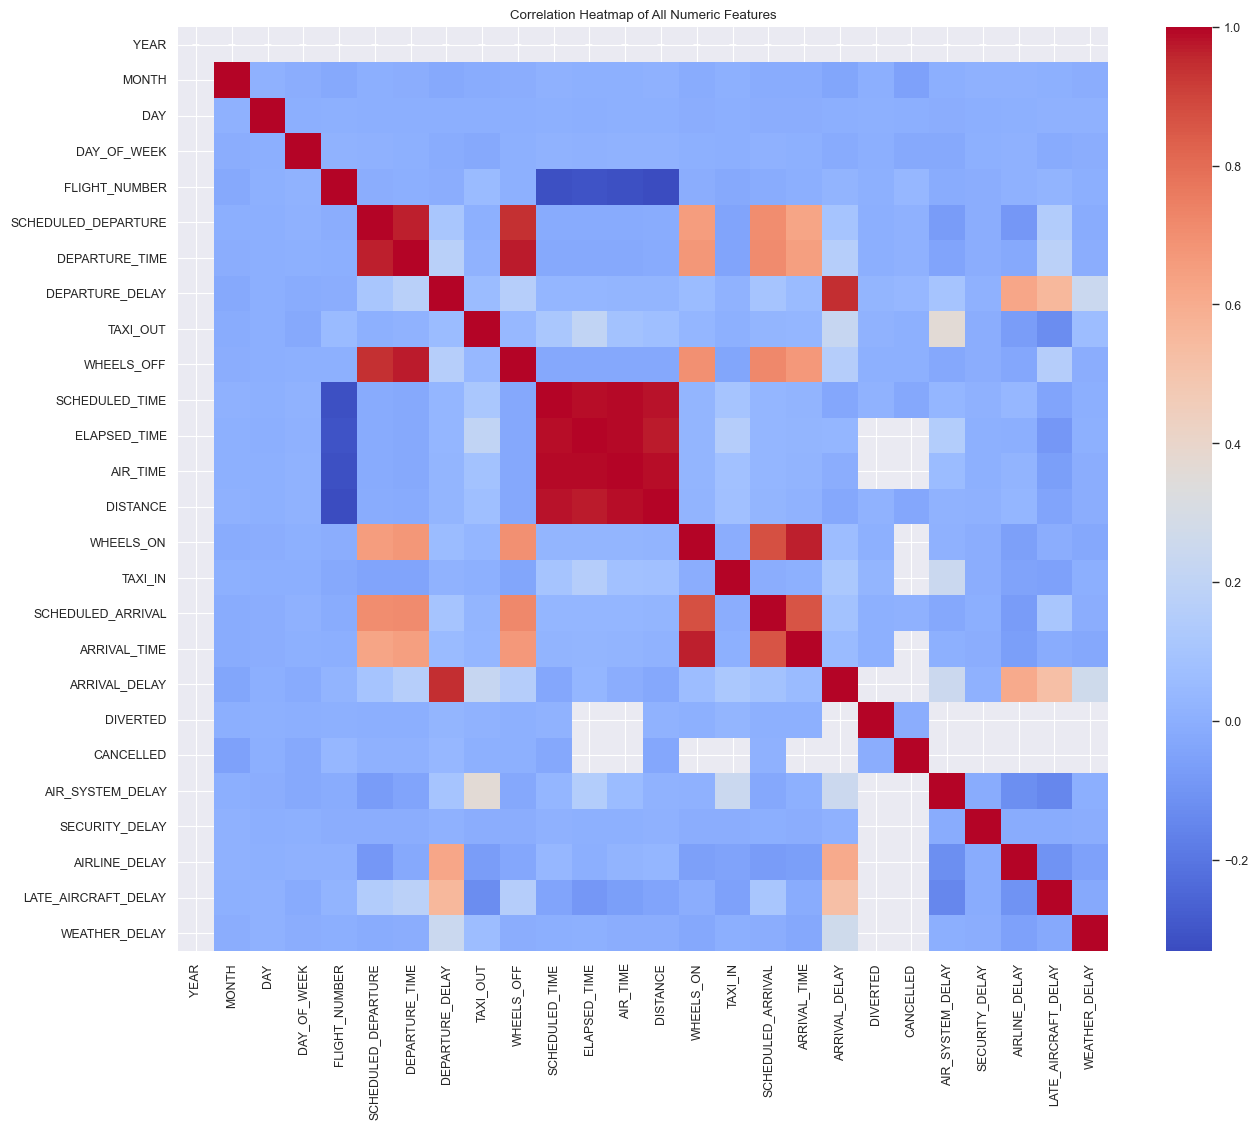

In [33]:
# Drop non-numeric columns
numeric_df = flights.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Numeric Features')
plt.show()

# Preprocessing the dataset and building the model 

In [34]:
def preprocess(flights):
    flights = flights.iloc[:, :23]
    flights.dropna(inplace=True)
    flights['DELAYED'] = flights['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 0 else 0)
    flights.reset_index(drop=True, inplace=True)

    df = pd.DataFrame()
    df['DAY'] = flights["DAY_OF_WEEK"]
    df['MONTH'] = flights['MONTH']
    df['AIRLINE'] = flights["AIRLINE"]
    df['FLIGHT_NUMBER'] = flights['FLIGHT_NUMBER'].astype(str)  # Ensure FLIGHT_NUMBER is a string
    df['TAIL_NUMBER'] = flights['TAIL_NUMBER'].apply(str)
    df['ORIGIN'] = flights['ORIGIN_AIRPORT'].apply(str)
    df['DESTINATION'] = flights['DESTINATION_AIRPORT'].apply(str)
    df['DISTANCE'] = flights['DISTANCE']
    df['SCHEDULED_DEPARTURE'] = flights['SCHEDULED_DEPARTURE']
    df['SCHEDULED_ARRIVAL'] = flights['SCHEDULED_ARRIVAL']
    df['TAXI_OUT'] = flights['TAXI_OUT']
    df['DEPARTURE_DELAY'] = flights['DEPARTURE_DELAY']
    df['DELAYED'] = flights['DELAYED']

    continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns
    continuous_vars = continuous_vars.drop(['DAY', 'MONTH', 'DELAYED'])
    scaler = StandardScaler()
    df[continuous_vars] = scaler.fit_transform(df[continuous_vars])

    categorical_vars = df.select_dtypes(include=['object']).columns
    encoders = {}

    for feature in categorical_vars:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature].astype(str))
        encoders[feature] = le
        if feature == 'FLIGHT_NUMBER':
            print(f"Encoded values for '{feature}':", df[feature].unique())

    print(f"Encoded features: {categorical_vars}")

    target = 'DELAYED'
    X = df.drop(columns=[target])
    Y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

    return X_train, X_test, X_val, y_train, y_test, y_val, encoders


In [35]:
def lstm(X_train, X_test, X_val, y_train, y_test, y_val):
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    model = Sequential([
        LSTM(units=256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        LSTM(units=128, return_sequences=True),
        LSTM(units=64, return_sequences=True),
        LSTM(units=32, return_sequences=False),
        Dense(units=16, activation='sigmoid'),
        Dense(units=1, activation='sigmoid')
    ])

    optimizer_ = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer_, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_val, y_val), verbose=1)

    # Evaluate model on test set
    y_pred_proba = model.predict(X_test)
    y_pred = np.where(y_pred_proba > 0.5, 1, 0)  

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Save the model
    model.save('lstm_model.h5')
    model.save_weights('lstm_model_weights.weights.h5')


In [36]:
df1 = flights[flights['ARRIVAL_DELAY'] > 15]
df2 = flights[flights['ARRIVAL_DELAY'] <= 0].sample(frac=0.3) 
final_df = pd.concat([df1,df2])

In [37]:
X_train, X_test,X_val,y_train,y_test, y_val,encoders = preprocess(final_df)

Encoded values for 'FLIGHT_NUMBER': [5519  755   36 ... 6274 6217 6315]
Encoded features: Index(['AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN', 'DESTINATION'], dtype='object')


DELAYED                1.000000
DEPARTURE_DELAY        0.530407
TAXI_OUT               0.283496
SCHEDULED_DEPARTURE    0.195179
SCHEDULED_ARRIVAL      0.168083
DESTINATION            0.060427
ORIGIN                 0.049427
AIRLINE                0.038461
FLIGHT_NUMBER          0.023477
DISTANCE               0.005738
DAY                   -0.018531
TAIL_NUMBER           -0.020729
MONTH                 -0.066227
Name: DELAYED, dtype: float64


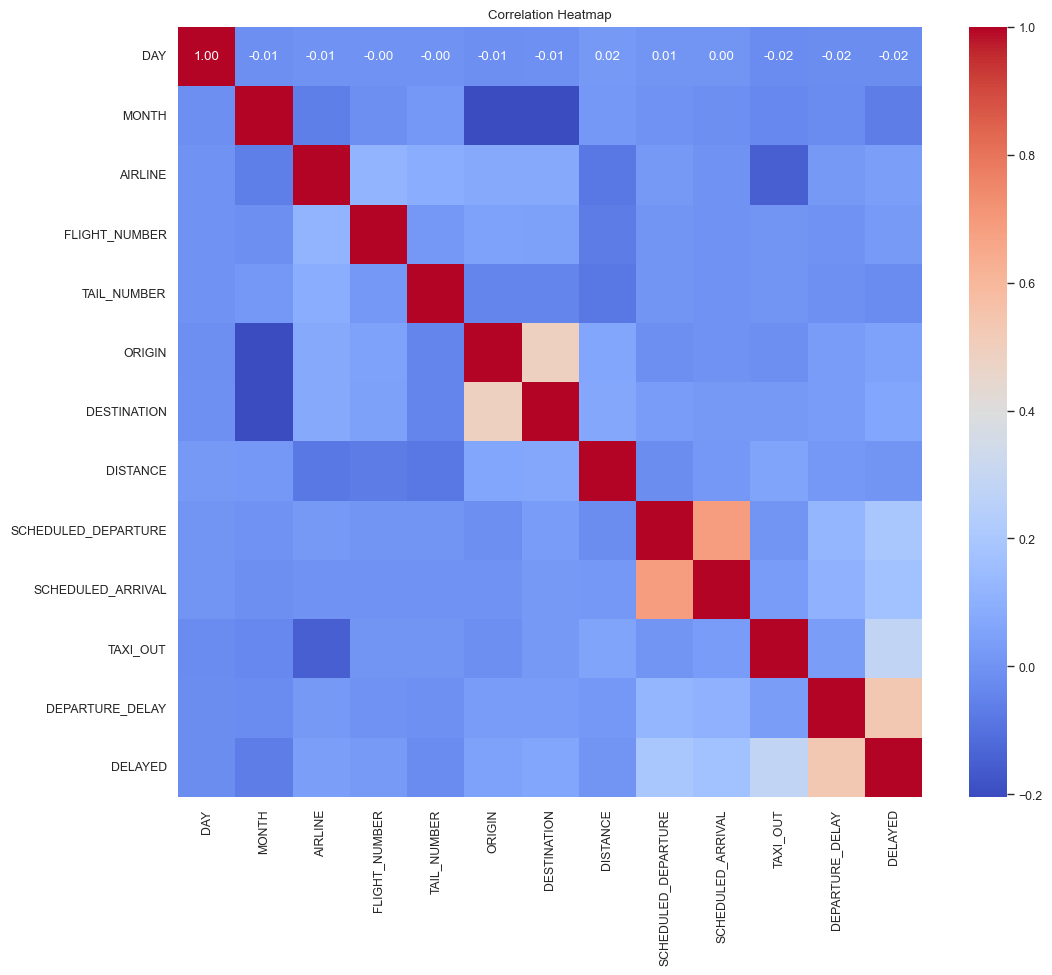

In [38]:
df = pd.DataFrame(X_train)
df['DELAYED'] = y_train
corr = df.corr()
corr_target = corr['DELAYED'].sort_values(ascending=False)
print(corr_target)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Epoch 1/10
5939/5939 [==============================] - 86s 14ms/step - loss: 0.5525 - accuracy: 0.6543 - val_loss: 0.1873 - val_accuracy: 0.9358
Epoch 2/10
5939/5939 [==============================] - 77s 13ms/step - loss: 0.1984 - accuracy: 0.9295 - val_loss: 0.2366 - val_accuracy: 0.9166
Epoch 3/10
5939/5939 [==============================] - 78s 13ms/step - loss: 0.1959 - accuracy: 0.9306 - val_loss: 0.1844 - val_accuracy: 0.9381
Epoch 4/10
5939/5939 [==============================] - 79s 13ms/step - loss: 0.1927 - accuracy: 0.9318 - val_loss: 0.1961 - val_accuracy: 0.9294
Epoch 5/10
5939/5939 [==============================] - 80s 13ms/step - loss: 0.1905 - accuracy: 0.9331 - val_loss: 0.1856 - val_accuracy: 0.9378
Epoch 6/10
5939/5939 [==============================] - 85s 14ms/step - loss: 0.1895 - accuracy: 0.9336 - val_loss: 0.1875 - val_accuracy: 0.9338
Epoch 7/10
5939/5939 [==============================] - 85s 14ms/step - loss: 0.1893 - accuracy: 0.9336 - val_loss: 0.1968 -

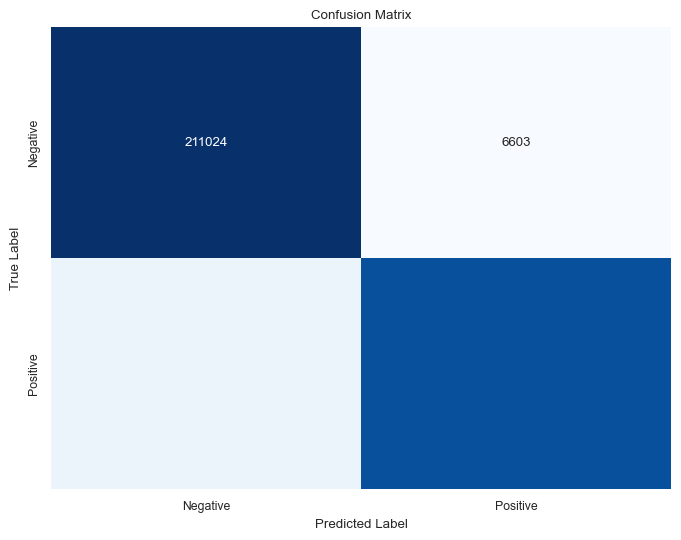

In [39]:
lstm(X_train.to_numpy(), X_test.to_numpy(), X_val.to_numpy(), y_train.to_numpy(), y_test.to_numpy(), y_val.to_numpy())

In [40]:
def reverse_encoding(encoded_data, feature_name):
    le = encoders[feature_name]
    return le.inverse_transform(encoded_data)

In [41]:
loaded_model = load_model('lstm_model.h5')

X_test2 = X_test.to_numpy()
X_test2 = X_test2.reshape(X_test2.shape[0], 1, X_test2.shape[1])

predictions = loaded_model.predict(X_test2)

13198/13198 [==============================] - 20s 1ms/step


In [42]:
threshold = 0.5
predictions_binary = ['delayed' if prob >= threshold else 'not delayed' for prob in predictions]

In [43]:
encoded_flight_numbers = X_test['FLIGHT_NUMBER']
original_flight_numbers = reverse_encoding(encoded_flight_numbers, 'FLIGHT_NUMBER')

In [44]:
X_test

,DAY,MONTH,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN,DESTINATION,DISTANCE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,TAXI_OUT,DEPARTURE_DELAY
1082609,3,1,3,1161,4381,399,461,-0.982779,-0.756845,-0.803336,-0.206322,-0.464888
1327422,2,4,13,6698,4706,582,543,1.114835,-1.547954,-1.581312,-0.723572,-0.518491
980395,2,12,2,6676,455,345,355,-0.755743,0.554732,0.551280,0.397137,0.821571
278539,4,4,10,231,1252,455,478,2.034495,-1.129499,-0.942121,1.690262,-0.447021
22828,1,1,4,4723,3119,531,324,-0.012118,-0.673570,-0.349843,1.259220,1.125318
...,...,...,...,...,...,...,...,...,...,...,...,...
1002768,7,12,9,6099,3251,457,364,0.158981,1.304204,1.526681,1.086804,0.964511
1941485,1,10,13,2261,4335,109,49,-0.619193,-1.610410,-1.571539,-0.809780,-0.536358
1794318,5,2,13,3935,3541,600,486,0.098109,-0.496611,-0.154372,-0.551155,-0.482756
11044,6,1,0,534,1433,392,470,0.925639,0.533913,1.018456,-0.120113,1.161053


In [45]:
loaded_model = load_model('lstm_model.h5')

X_test2 = X_test.to_numpy()
X_test2 = X_test2.reshape(X_test2.shape[0], 1, X_test2.shape[1])

predictions = loaded_model.predict(X_test2)

threshold = 0.5
predictions_binary = ['delayed' if prob >= threshold else 'not delayed' for prob in predictions]

encoded_flight_numbers = X_test['FLIGHT_NUMBER']
original_flight_numbers = reverse_encoding(encoded_flight_numbers, 'FLIGHT_NUMBER')

original_flight_numbers = pd.Series(original_flight_numbers).reset_index(drop=True)
actual = y_test.reset_index(drop=True)
predictions_words = pd.Series(predictions_binary).reset_index(drop=True)
predictions_percentage = list(predictions.reshape(-1))

df = pd.DataFrame({
    'Flight Number': original_flight_numbers,
    'Actual': actual,
    'Prediction': predictions_words,
    'Prediction Percentage': predictions_percentage
})


13198/13198 [==============================] - 21s 2ms/step


In [46]:
flight_counts = df['Actual'].value_counts()
print(flight_counts)

Actual
0    217627
1    204700
Name: count, dtype: int64


In [47]:
df_subset = df.groupby('Flight Number').head(5)

In [48]:
random.seed(42)
fake = Faker()

start_date = date(2024, 5, 15)
end_date = date(2024, 5, 19)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

def assign_unique_dates(df, date_range):
    grouped = df.groupby('Flight Number')

    results = []

    for name, group in grouped:

        n = min(len(group), len(date_range))
        
        unique_dates = random.sample(date_range, n)
        
        if len(group) > len(unique_dates):
            unique_dates = unique_dates * (len(group) // len(unique_dates)) + unique_dates[:len(group) % len(unique_dates)]
        
        random.shuffle(unique_dates)
        
        group['Date'] = unique_dates

        results.append(group)

    return pd.concat(results)

df_subset = assign_unique_dates(df_subset, date_range)

print(df_subset)


      Flight Number  Actual   Prediction  Prediction Percentage        Date
86                1       1      delayed               0.989166  2024-05-16
2481              1       0  not delayed               0.036008  2024-05-15
3018              1       1      delayed               0.988324  2024-05-17
11596             1       1      delayed               0.988019  2024-05-18
15673             1       1  not delayed               0.250296  2024-05-19
...             ...     ...          ...                    ...         ...
4600            999       0  not delayed               0.040989  2024-05-15
7060            999       0  not delayed               0.046674  2024-05-19
7729            999       1      delayed               0.947915  2024-05-17
9264            999       0  not delayed               0.054321  2024-05-16
15073           999       1      delayed               0.907980  2024-05-18

[32028 rows x 5 columns]


In [49]:
df_subset

,Flight Number,Actual,Prediction,Prediction Percentage,Date
86,1,1,delayed,0.989166,2024-05-16
2481,1,0,not delayed,0.036008,2024-05-15
3018,1,1,delayed,0.988324,2024-05-17
11596,1,1,delayed,0.988019,2024-05-18
15673,1,1,not delayed,0.250296,2024-05-19
...,...,...,...,...,...
4600,999,0,not delayed,0.040989,2024-05-15
7060,999,0,not delayed,0.046674,2024-05-19
7729,999,1,delayed,0.947915,2024-05-17
9264,999,0,not delayed,0.054321,2024-05-16


In [50]:
flight_counts = df_subset['Flight Number'].value_counts()
flight_counts

df_subset[df_subset['Flight Number'] == '66']

df_subset.to_csv('trialF.csv',index = False)

In [51]:
df_subset.to_csv('trialF.csv',index = False)